# HW #7 Neural Networks

In this HW, we'll be exploring a visual proof of the universal approximation theorem and building (from scratch) a neural network that will approximate a pretty ridiculous function.

Head over to [this site](http://neuralnetworksanddeeplearning.com/chap4.html) and read from the beginning of the page until the "Many Input Variables" section. (You do not need to read the "Many Input Variables" section and beyond but are certainly welcome to do so!) You'll read the introduction, the "Two Caveats" section, and the "Universality with One Input and One Output" section.

Your answers to problems 1-5 should come from directly this reading.

**Problem 1**: Summarize the Universal Approximation Theorem. (Don't copy it; use your own words!)

**Answer: In the area of neural network, suppose we will build a neural network to approximate the function with one input and one ouput, even with only  a single hidden layer, if we could have a sufficient number of neurons, we can compute any continuous function and implement the approximation with higher or any kind of precision what we want. This can be generalized to more than one inputs and outputs.**

**Problem 2**: Summarize the two caveats the author uses to describe the statement "a neural network can compute any function."

**Answer: The first caveat is that through the neural network, what we did is approximation, not compute the true value of the function, so there will be some error, but with enough neurons, we will have a better approximation within the accuracy what we want for each input.**

**The second caveat is that by using neural network, we can approximate the continous function, not a discontinuous function.**

**Problem 3:** For a sigmoidal activation function to closely resemble a step function, how would you describe the value of $w$? What constraints exist on the value of $b$? How do we calculate $s$? What does the value of $s$ indicate?

Try playing around with the applets on [this site](http://neuralnetworksanddeeplearning.com/chap4.html) to test how different parts of the perceptron affect the output. This should be helpful in answering the questions above.

** Answer: For a sigmoid function to closely resemble a step function, we do this by fixing the weight $w$ to be some very large value, and then setting the position of the step by modifying the bias$b$.**

 **The position of the step is proportional to $b$, and inversely proportional to $w$, the step is at position $s=−b/w$,  as the graphical indicated, if 0<$s$<1, and $0<−b/w<1$, and if $w$ is a positive big number, then$-w<b<0$, and if $w$ is a negative number, then$0<b<-w$, which the value of $b$ is constrains by $w$ .**
 
 **$s=−b/w$, it indicate the step position, which means the value of x when the function has the step. **

**Problem 4**: When the author wants us to approximate $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ with a neural network, the function on the applet where we manipulate the values of $h_i$ is not $f(x)$. It's a different function. What is this function, and where on the feedforward Neural Network is can the vaule of this function be collected?


**Answer: we use the$ ∑_jw_ja_j$ to manipulate the value of h, and we collect the value from every neurons of the previous hidden layer .**

**Problem 5**: The author asks you to find values of $h_i$ that make your neural network closely approximate $\sigma^{-1}\circ f(x)$. Record your values of $h_i$ here and your best "average deviation" score. Let's name the $h$s from top to bottom on the graph as $h_1$, $h_2$ ,,,, $h_5$,

**Answer: $h1= -1.2, h2=-1.2, h3=-0.3, h4=-1.0, h5=1.1$ and the average deviation score is 0.38.**

**Problem 6**: Build the neural network from your work in Problem 5 here with MLPClassifier.

A few things to keep in mind:
* How many inputs are there? 
* How many outputs are there?
* How many neurons are in the hidden layer?


In [25]:
import numpy as np
import pandas as pd
import math
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
X = np.linspace(0, 1, 500).astype('float').reshape(-1,1)
y = []
for x in X:
  f = 0.2 + 0.4*math.pow(x, 2) + 0.3*x*math.sin(15*x) + 0.05*math.cos(50*x)
  y.append(f)
y = np.asarray(y).astype('str')
print(y)
  
clf = MLPClassifier(activation = 'relu',solver='sgd',hidden_layer_sizes=(100,100), max_iter=500)
print(clf.fit(X, y)) 
y_pred = clf.predict(X)
print(clf.score)
print(y_pred)
print(clf.n_outputs_)
print("weights between input and hidden layer:")
print(clf.coefs_[0])
print("\nweights between the hidden layer to the output layer:")
print(clf.coefs_[1])




['25' '24' '24' '24' '24' '24' '24' '23' '23' '23' '22' '22' '22' '21'
 '21' '20' '20' '19' '19' '19' '18' '18' '17' '17' '17' '17' '16' '16'
 '16' '16' '16' '16' '16' '16' '17' '17' '17' '17' '18' '18' '19' '19'
 '20' '20' '21' '21' '22' '23' '23' '24' '24' '25' '25' '26' '26' '27'
 '27' '28' '28' '28' '28' '29' '29' '29' '29' '29' '29' '28' '28' '28'
 '28' '27' '27' '26' '26' '26' '25' '25' '24' '23' '23' '22' '22' '21'
 '21' '20' '20' '20' '19' '19' '18' '18' '18' '18' '18' '18' '18' '18'
 '18' '18' '18' '18' '18' '18' '19' '19' '19' '20' '20' '20' '20' '21'
 '21' '21' '22' '22' '22' '22' '23' '23' '23' '23' '23' '23' '23' '23'
 '22' '22' '22' '22' '21' '21' '20' '20' '19' '19' '18' '18' '17' '16'
 '16' '15' '15' '14' '13' '13' '12' '12' '11' '11' '10' '10' '10' '9' '9'
 '9' '9' '9' '9' '9' '9' '10' '10' '10' '10' '11' '11' '12' '12' '13' '14'
 '14' '15' '15' '16' '17' '17' '18' '19' '19' '20' '20' '21' '21' '22'
 '22' '23' '23' '24' '24' '24' '24' '24' '25' '25' '25' '25' '25' '25'

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**The input is one, output is one, and the neurons in the hidden layer is 10.**

**Problem 7**: Once you've built the neural network with the structure described in Problem 6, use `np.linspace` to generate 1000 values of $x$ between 0 and 1 and estimate the performance of your neural network using mean squared error.

Recall that mean squared error(MSE) is given by:

$$
\frac{1}{n}\sum_{i=1}^n (\hat{y}-y)^2
$$


* Your $\hat{y}$ in this case are your predicted values from your neural network for each of the $x$ that you generated using `np.linspace`. Make sure to take into account the final activation function!
* Your $y$ values are the actual observed values of $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ for each of the $x$ that you generated using `np.linspace`.
* Use  [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) for this work.
* Plot  $f(x)$ curve overlapped with the curve predicted by your trained Neural Networks for x between 0 and 1
* Try different learning rates

In [0]:
data = np.linspace(0, 1, 1000).astype('float64').reshape(-1,1)
result = []
for x in data:
  f = 0.2 + 0.4*math.pow(x, 2) + 0.3*x*math.sin(15*x) + 0.05*math.cos(50*x)
  result.append(f)
  

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.021110657891637914


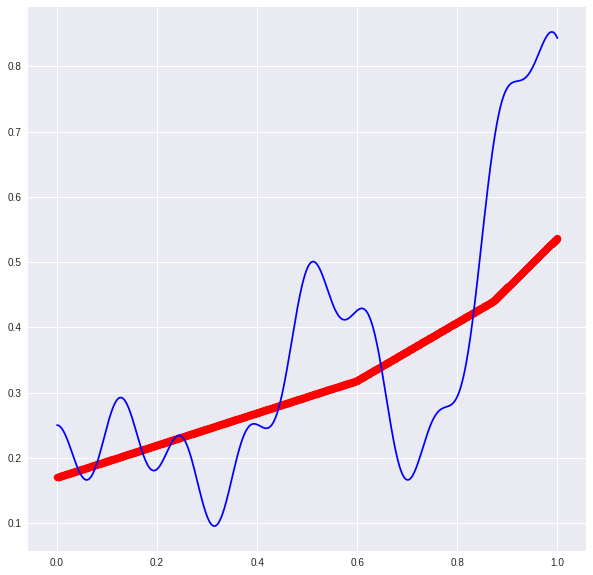

In [40]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
def train_mlp(X,y,units, activation='relu', sgd=False, lr=0.001, batch_size=200, max_iter=500):
    mlp = MLPRegressor(hidden_layer_sizes=units, activation=activation)
    if sgd:
        mlp.set_params(solver='sgd', batch_size=batch_size, momentum=0.0, learning_rate_init=lr)

    mlp.fit(X, y)
    y_pred = mlp.predict(X)
    
    score = mean_squared_error(y,y_pred)
    print(score)
   
    # plot
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.plot(X, y, color='blue')
    ax.scatter(X, y_pred, c='red')
  
train_mlp(X= data, y=result, units = 10, activation='relu', sgd=True, lr=0.001, batch_size=200, max_iter=500)
   

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.08620891028527151


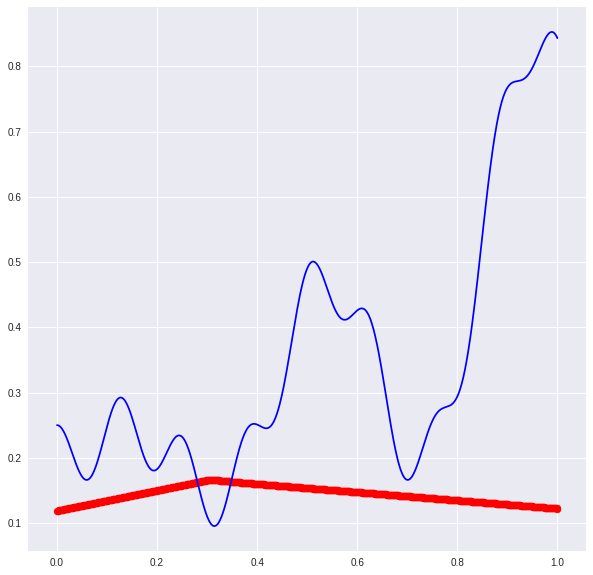

In [36]:
train_mlp(X= data, y=result, units = 10, activation='relu', sgd=True, lr=0.0001, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.02490679205982926


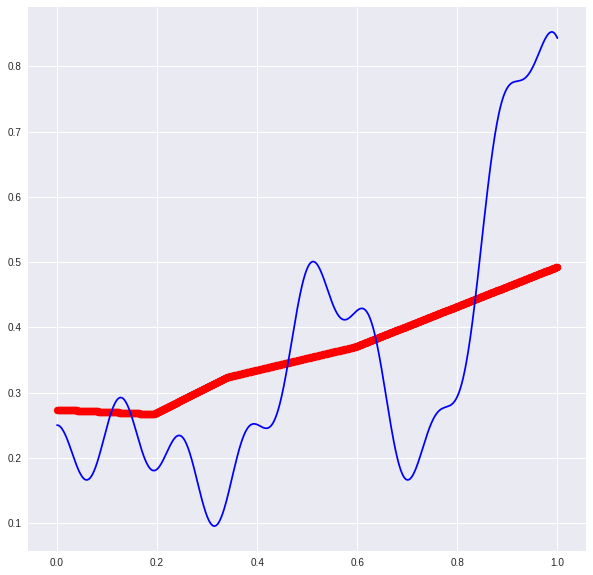

In [35]:
train_mlp(X= data, y=result, units = 10, activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.020386798259239704


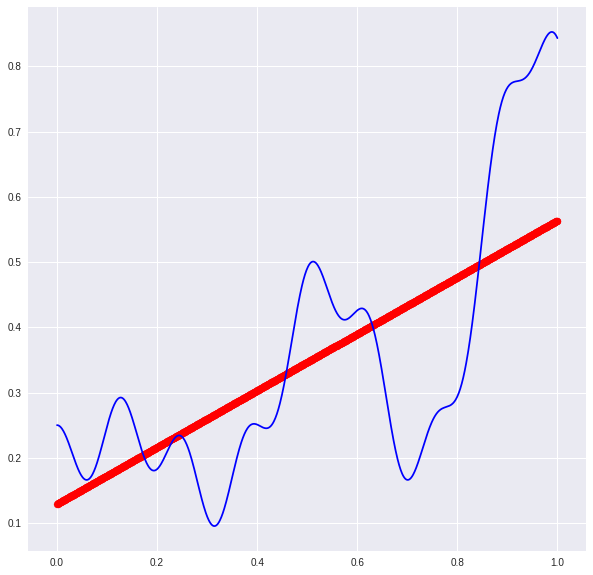

In [30]:
train_mlp(X= data, y=result, units = 10, activation='relu', sgd=True, lr=0.1, batch_size=200, max_iter=500)


**I tried to change the learning rate, from0.0001 to 0.1, I will choose 0.01 for the afterward work.**

**Problem 8**: Suppose you wanted to increase the performance of this neural network. How might you go about doing so?
* You try different number of hidden layers and different number of neurons in each hidden layer.
* Report your best Neural Network structure and the minimum MSE you can get.

**Answer: increase the number of hidden layer or change the number of neurons in the each layer, maybe try to change the activation function and tune the parameters of the MLPregressor will improve the performance of the neural network.**

**I tried many times, hold the other parameters, change the number of hidden layers and the number of neurons, from the one hidden layer to five hidden layers, the number of neurons from 1 to 10 and even more, the best one is three hidden layers with the neurons 10, 6 and 2, respectively. The MSE is around 0.0204.**

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.023643482804980777


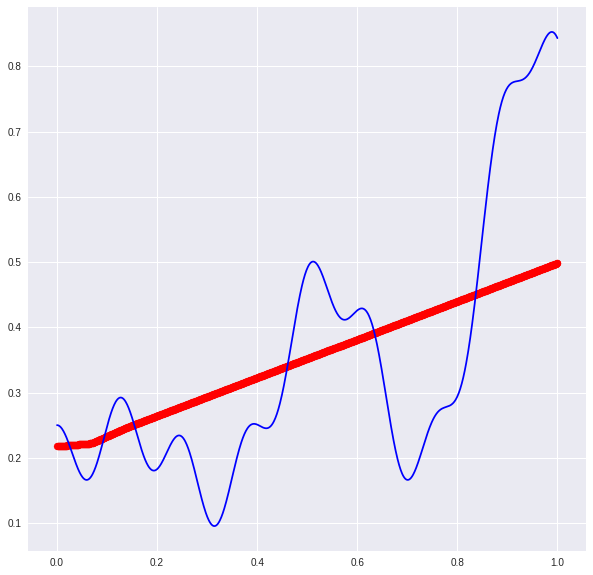

In [55]:
train_mlp(X= data, y=result, units =(10,10), activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03214454181447048


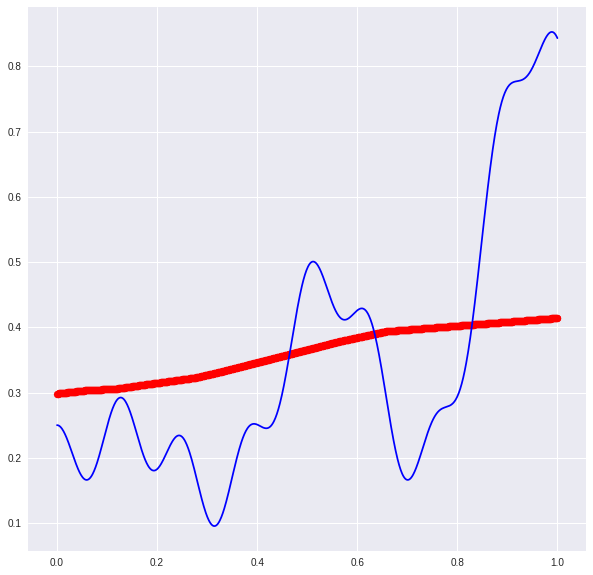

In [56]:
train_mlp(X= data, y=result, units = (10,20), activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.024703970575483573


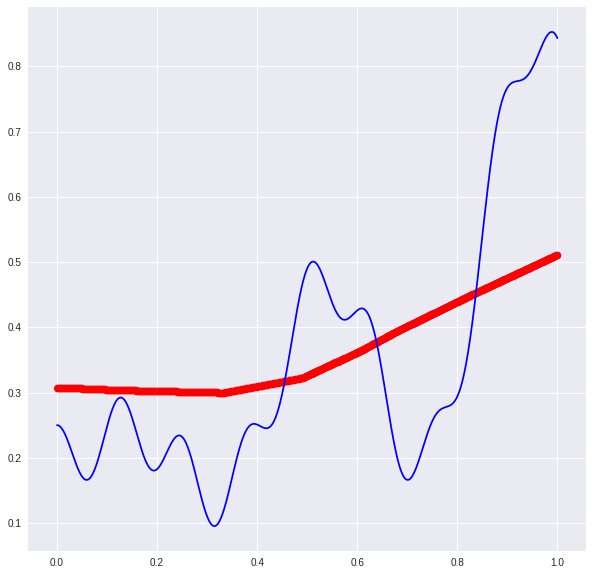

In [57]:
train_mlp(X= data, y=result, units = (20,20), activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.024969639258934934


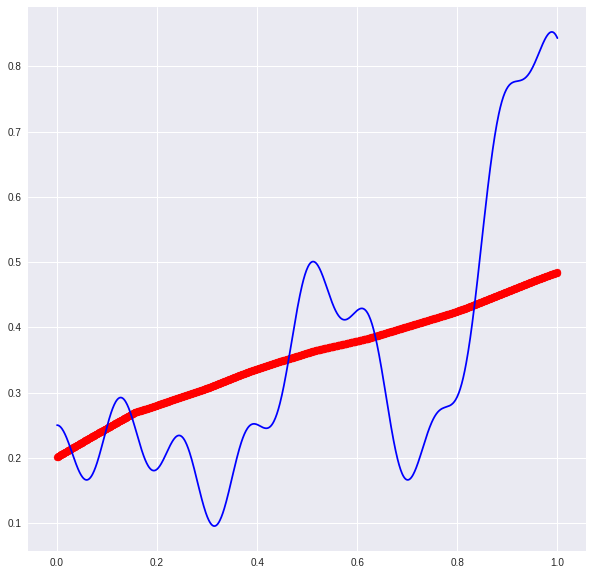

In [58]:
train_mlp(X= data, y=result, units = (20,30), activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.034025124814994194


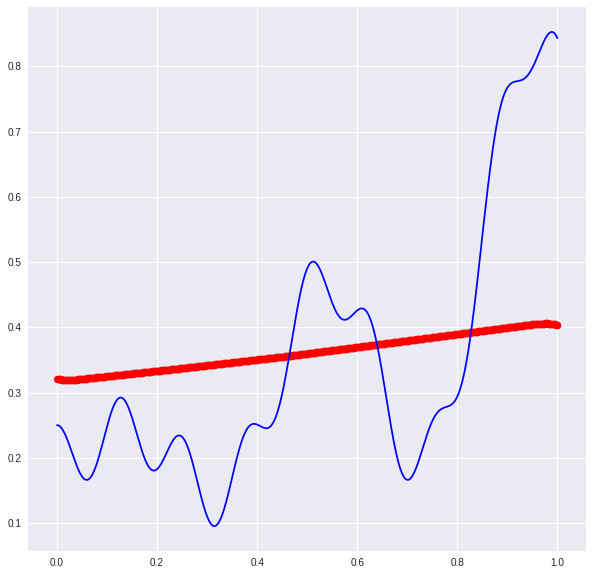

In [59]:
train_mlp(X= data, y=result, units = 20, activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03985388688287556


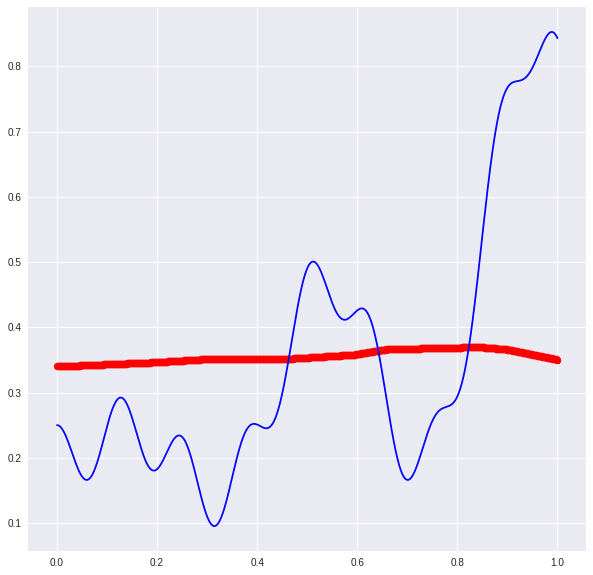

In [66]:
train_mlp(X= data, y=result, units = (10,20,20), activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.020368254064663235


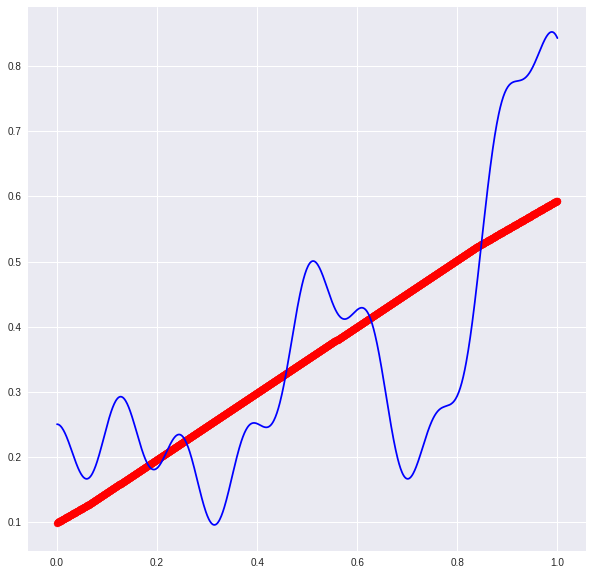

In [48]:
train_mlp(X= data, y=result, units = (10,6,2), activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.039651979029750546


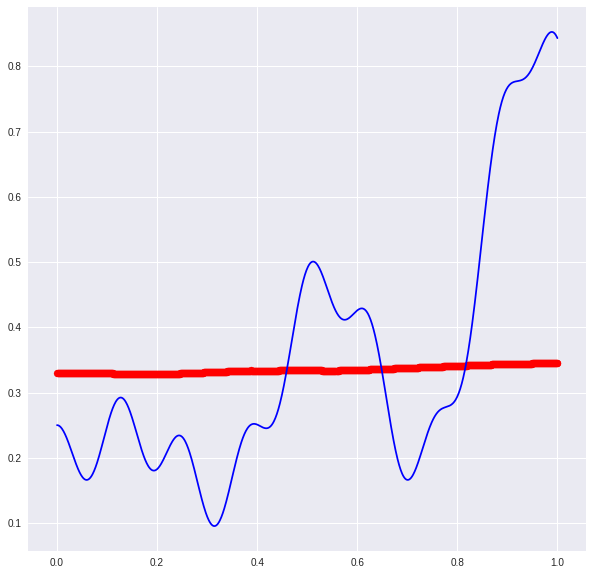

In [61]:
train_mlp(X= data, y=result, units = (10,20,20,10), activation='relu', sgd=True, lr=0.01, batch_size=200, max_iter=500)